The first calculation solves
$$\pi(2)+(1-\pi)(0) = \pi (1)+(1-\pi) (1)$$
while the second solves
$$\rho (2)+(1-\rho) (2) = \rho (3)$$


In [1]:
var('pi,rho')
eq1 = pi*2+(1-pi)*0 == pi*1+(1-pi)*1
eq2 = rho*2+(1-rho)*2 == rho*3+(1-rho)*0
sol = solve([eq1,eq2], [pi,rho])
show(sol[0])

[pi == (1/2), rho == (2/3)]

The next problem we tried to solve was the network problem describe in the price of anarchy reading.

Recall there are two routers, packets in the first router get through for sure while packets in the second router a processes with probability $\beta < 1$.  If two packets arrive at the same router each gets through with proabability $\frac{1}{2}$.

This game is perfectly symmetric.  So we only need to find one mixing probability, we'll call it $\pi$, with which each of the two computers sends its packet to the efficient router.  This is just a mixed strategy equilibrium.  So solve
$$\frac{\pi}{2}+(1-\pi) = \pi\beta+(1-\pi)\frac{\beta}{2}$$


In [2]:
var('beta')
sol2 = solve(pi/2+(1-pi) == pi*beta+(1-pi)*beta/2,pi)
show (sol2[0])

pi == -(beta - 2)/(beta + 1)

We want to do a little more with this problem - in particular, figure out how the expected number of packets that get through varies with the probability computers use to send their packets to the efficient router.  If both use the probability $\beta$, then the expected number of packets that get through is given by the expression
$$\pi^2  +2(1-\pi)\pi(1+\beta)+(1-\pi)^2 \beta$$ 

In [3]:
exp = pi^2+2*(1-pi)*pi*(1+beta)+(1-pi)^2*beta
show(latex(exp))

\beta {\left(\pi - 1\right)}^{2} - 2 \, {\left(\beta + 1\right)} {\left(\pi - 1\right)} \pi + \pi^{2}

Now lets substitute a value for $\beta$ so we can do some plotting.

In [4]:
ess = exp.substitute(beta=4/5)
show(latex(ess))

\frac{4}{5} \, {\left(\pi - 1\right)}^{2} - \frac{18}{5} \, {\left(\pi - 1\right)} \pi + \pi^{2}

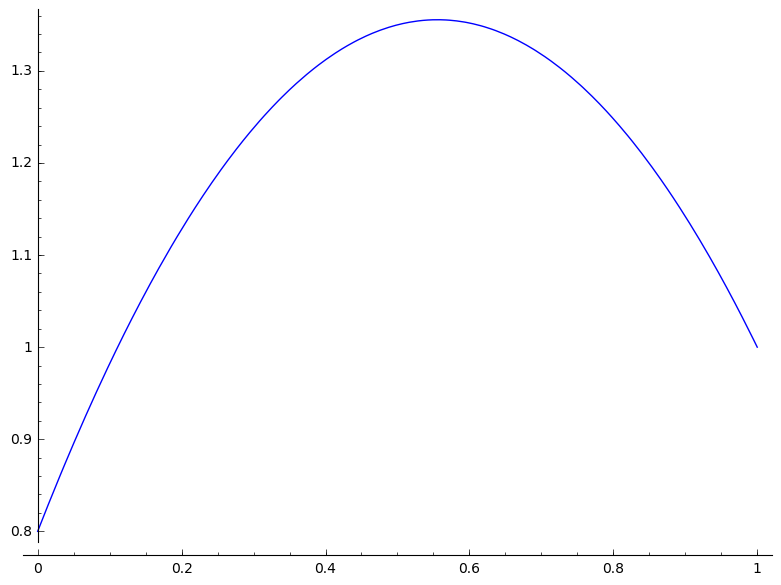

In [5]:
plot(ess,(pi,0,1))

It seems that if we want to get the maximal number of packets through the network, then there is a very specific value of $\pi$ that we want, the one where the function above is maximized.

In [6]:
d = diff(ess,pi)
show(latex(d))
show(latex(solve(d == 0,pi)))

-\frac{18}{5} \, \pi + 2

\left[\pi = \left(\frac{5}{9}\right)\right]

Recall that in the Nash equilibrium for this problem, the equilibrium value of $\pi$ is given by 
$$\frac{2-\beta}{1+\beta}$$
which, in the case where $\beta = \frac{4}{5}$ gives $\pi=\frac{2}{3}$
so that computers use the efficient router more frequently than a network planner would want them to.